In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
from CNN_analysis_helper import get_FASHION_MNIST_data

In [4]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'

In [5]:
x_train, x_valid, y_train_categorical, y_val_categorical = get_FASHION_MNIST_data(folder)

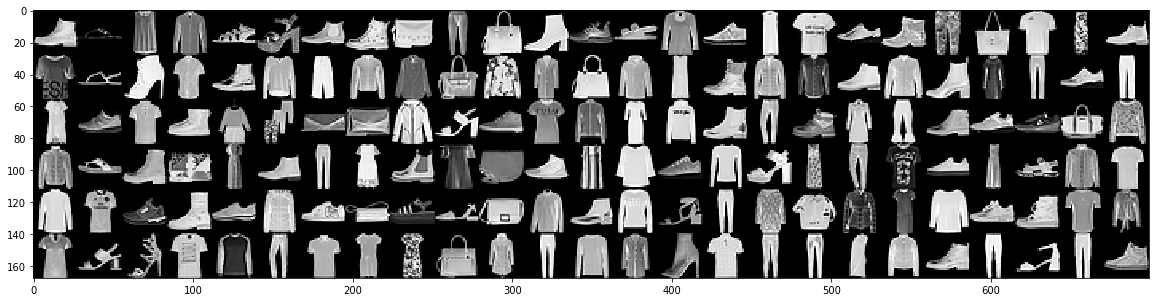

In [6]:
from MNIST_helper import plot_numbers
plot_numbers(x_train.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

## Armo modelo de una capa muy simple

In [7]:
n_filters = 6
def get_simple_model(activation = None):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=(28,28,1), 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    return model
model = get_simple_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 6)         60        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


## Imprimo dimensiones de los pesos

In [8]:
model.get_weights()[0].shape, model.get_weights()[1].shape

((3, 3, 1, 6), (6,))

In [9]:
# Matriz de 3x3
print(model.get_weights()[0][:,:,0,0])
print(model.get_weights()[1])

[[ 0.13773876 -0.16723859  0.2689186 ]
 [-0.19559589 -0.30200481  0.02072775]
 [ 0.12221265 -0.06716846 -0.17408969]]
[ 0.  0.  0.  0.  0.  0.]


In [10]:
from CNN_analysis_helper import plot_filter_coefs, plot_conv_filters, generate_random_image

## Filtros iniciados aleatoriamente

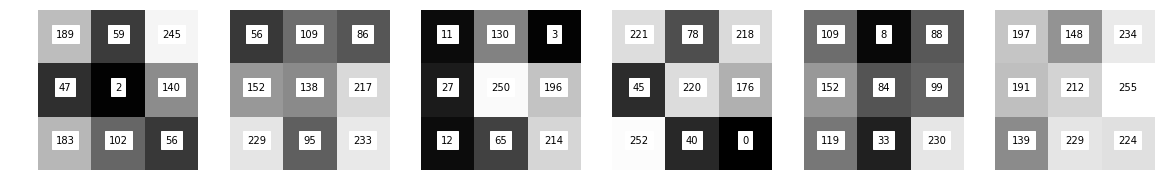

In [11]:
plot_filter_coefs('Conv1', model)

## Cambio pesos

In [12]:
weights = model.get_weights()
weights[0].shape

(3, 3, 1, 6)

In [13]:
weights[0][:,:,0,0] = np.array([[0, 0, 0], [0 , 1,  0], [0, 0, 0]])
weights[0][:,:,0,1] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
weights[0][:,:,0,2] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).T
weights[0][:,:,0,3] = np.array([[1, 0, -1], [0 , 1,  0], [-1, 0, 1]])
weights[0][:,:,0,4] = np.array([[1 , 1,  0], [1, 1, 0], [0, 0, 0]])
weights[0][:,:,0,5] = np.array([[1 , 1,  0], [1, 0, 0], [0, 0, 0]])
# weights[0][:,:,0,5] = np.array([[1, 1, 1], [1 , 1,  1], [1, 1, 1]])
# Normalizo
weights[0] = weights[0]/np.sqrt((weights[0]*weights[0]).sum(axis=0).sum(axis=0))

In [14]:
model.set_weights(weights)

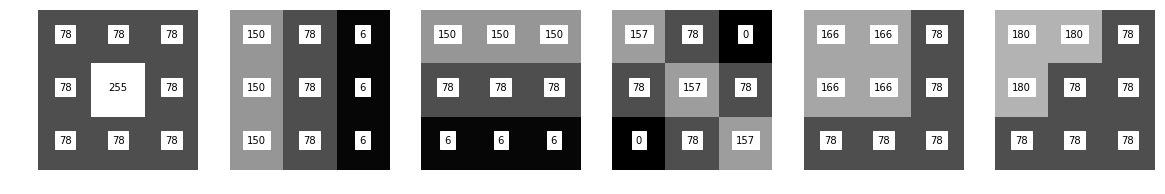

In [15]:
plot_filter_coefs('Conv1', model, normalize=True)

In [16]:
x_train.shape

(48000, 28, 28, 1)

In [17]:
activations_output = model.predict(x_train[100:104])
print(activations_output.shape)

(4, 26, 26, 6)


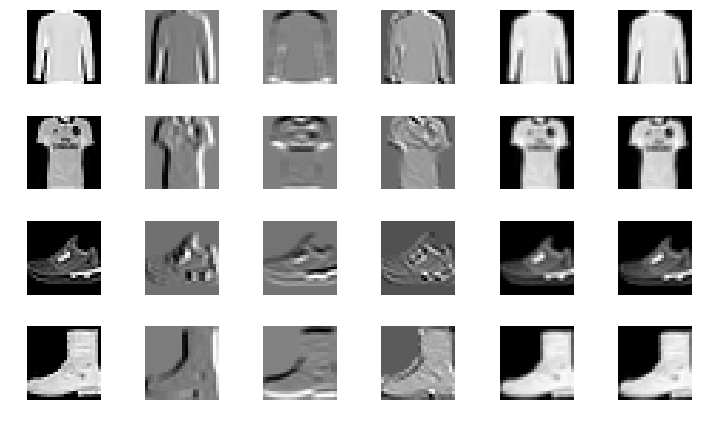

In [18]:
def plot_activations(activations_output, relative=False):
    f, ax = plt.subplots(activations_output.shape[0], n_filters, figsize=(10,6))
    f.tight_layout()
    for j in range(activations_output.shape[0]):
        vmax = activations_output[j,:,:,:].max()
        vmin = activations_output[j,:,:,:].min()
        
        #f.tight_layout() 
        for i in range(n_filters):
            ax[j, i].axis('off')
            if relative:
                ax[j, i].imshow(activations_output[j,:,:,i], cmap='gray', vmax=vmax, vmin=vmin)
            else:
                ax[j, i].imshow(activations_output[j,:,:,i], cmap='gray')
            
    plt.show()
plot_activations(activations_output)

## Relu

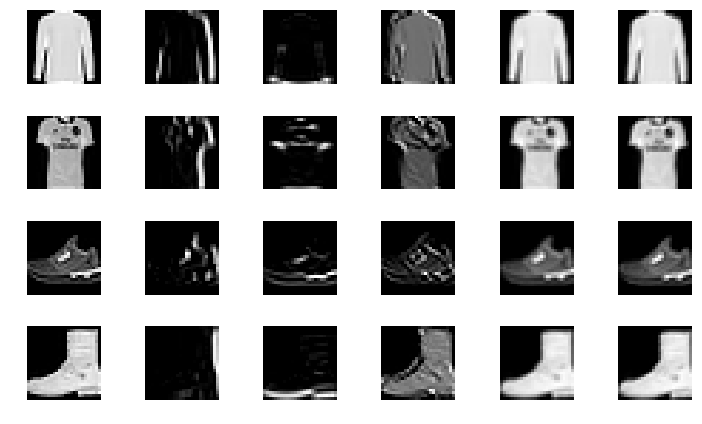

In [19]:
model_relu = get_simple_model('relu')
model_relu.set_weights(weights)
activations_output_relu = model_relu.predict(x_train[100:104])
plot_activations(activations_output_relu)

## Sigmoidea

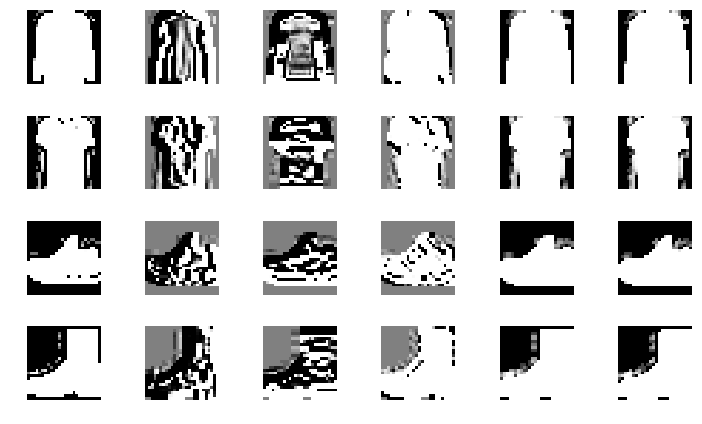

In [20]:
model_sigmoid = get_simple_model('sigmoid')
model_sigmoid.set_weights(weights)
activations_output_sigmoid = model_sigmoid.predict(x_train[100:104])
plot_activations(activations_output_sigmoid)

## Sigmoidea normalizando

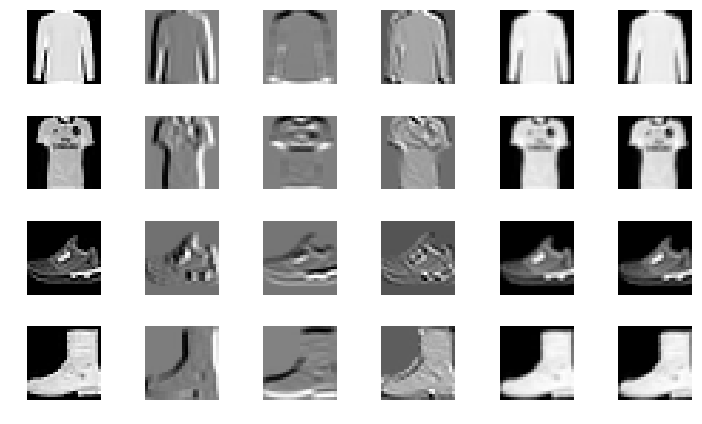

In [21]:
model_sigmoid_2 = get_simple_model('sigmoid')
weights2 = weights.copy()
weights2[0] = weights2[0]/256
model_sigmoid_2.set_weights(weights2)
activations_output_sigmoid = model_sigmoid_2.predict(x_train[100:104])
plot_activations(activations_output_sigmoid)

## Imagen artificial

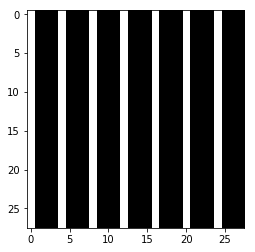

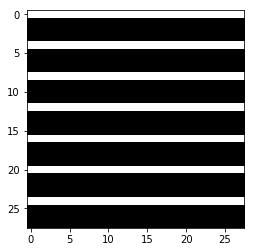

In [22]:
test_image = np.zeros([2, 28,28])
for i in range(28):
    for j in range(28):
        if j%4 == 0:
            test_image[0, i,j] = 1
        if i%4 == 0:
            test_image[1, i,j] = 1
plt.imshow(test_image[0,:,:], cmap = 'gray')
plt.show()
plt.imshow(test_image[1,:,:], cmap = 'gray')
plt.show()

(2, 26, 26, 6)


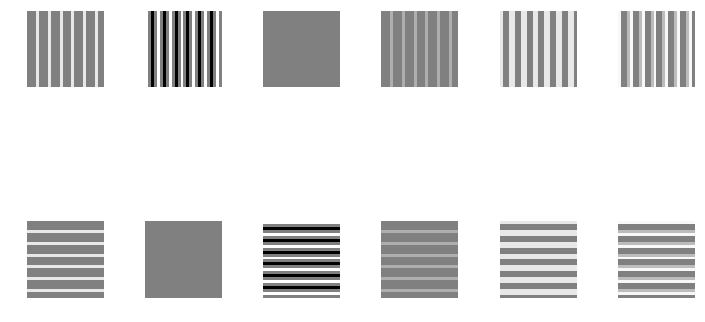

In [23]:
activations_output = model.predict(test_image.reshape(2,28,28,1))
print(activations_output.shape)
plot_activations(activations_output, relative=True)

## Modelo aprendido

In [52]:
from cnn_models import get_model, get_model_2, get_model_3, get_model_4, get_model_5

In [53]:
model_trained = get_model_5()
model_trained.load_weights('cnn-4.hdf5')

In [54]:
conv1_layer = model_trained.get_layer('Conv1')

In [55]:
conv1_weights = conv1_layer.get_weights()
conv1_weights[0].shape

(3, 3, 1, 6)

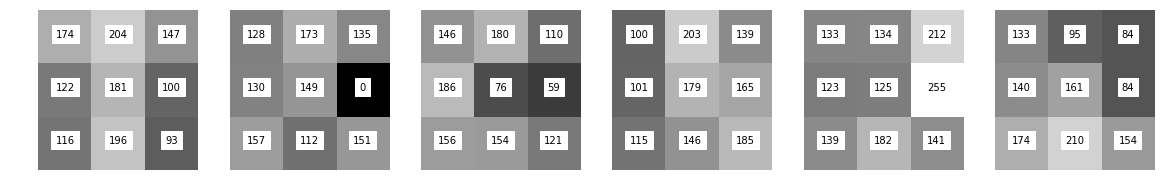

In [56]:
plot_filter_coefs('Conv1', model_trained, normalize=True)

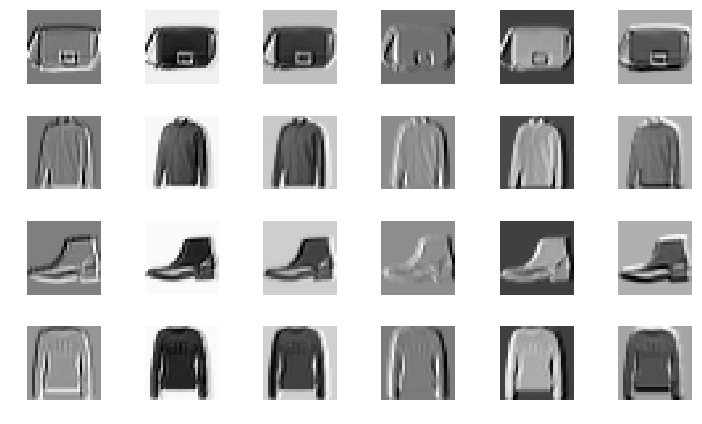

In [57]:
from keras.models import Model

intermediate_layer_conv1 = Model(inputs=model_trained.input,
                                 outputs=model_trained.get_layer('Conv1').output)
conv1_output = intermediate_layer_conv1.predict(x_train[110:114])
plot_activations(conv1_output)

## Salida de convolucionales mas adelante

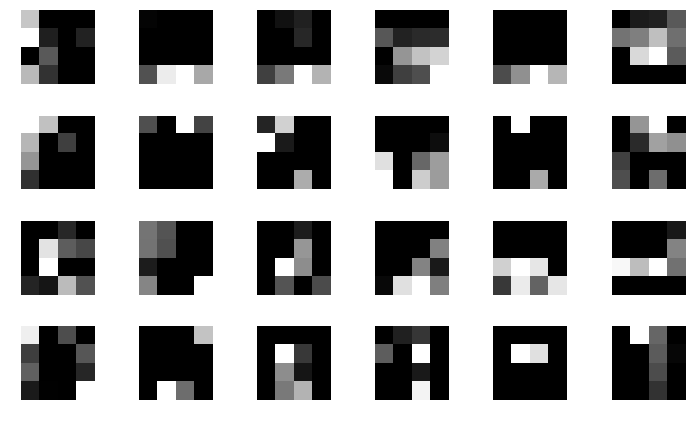

In [59]:
layer = 'MaxPool2'
intermediate_layer_conv2 = Model(inputs=model_trained.input,
                                 outputs=model_trained.get_layer(layer).output)
conv2_output = intermediate_layer_conv2.predict(x_train[110:114])
plot_activations(conv2_output)

## Random image

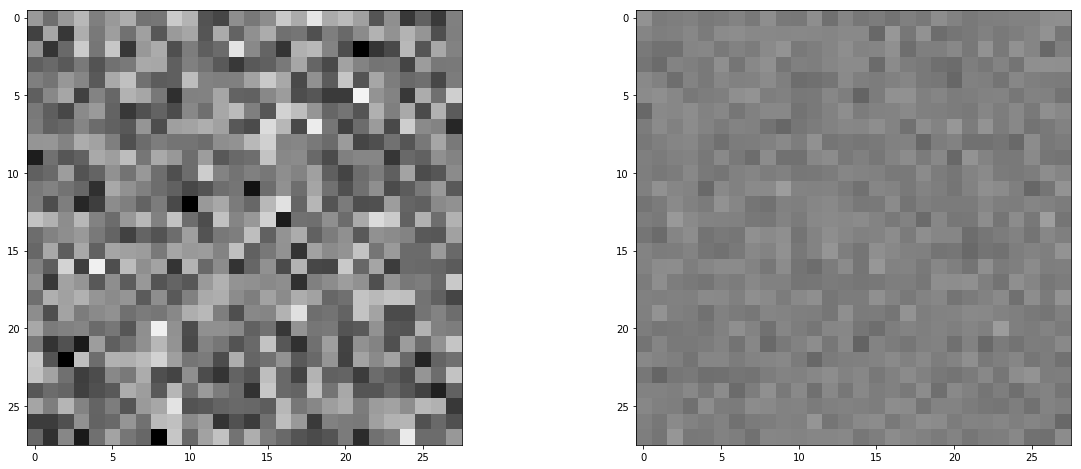

In [32]:
input_img_data_1 = generate_random_image(40)
input_img_data_2 = generate_random_image(10)
f, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].imshow(input_img_data_1[0,:,:,0], cmap = 'gray', vmin=0, vmax= 255)
ax[1].imshow(input_img_data_2[0,:,:,0], cmap = 'gray', vmin=0, vmax= 255)
plt.show()

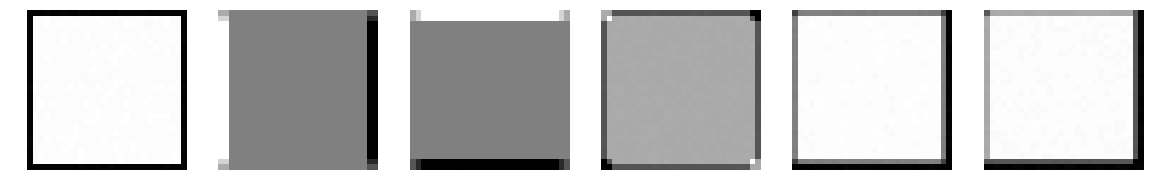

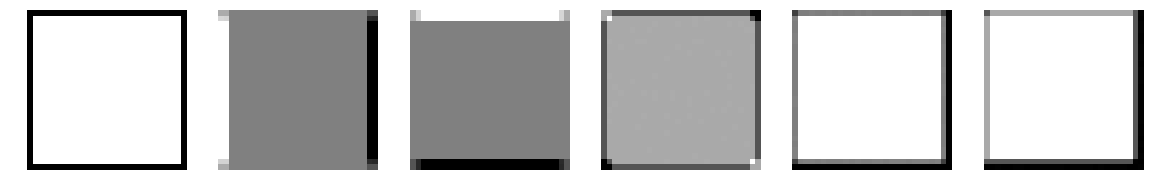

In [33]:
_ = plot_conv_filters(model, 'Conv1', input_img_data_1, iterations=100, step = 100)
_ = plot_conv_filters(model, 'Conv1', input_img_data_2, iterations=100, step = 100)

Se puede ver que con imagenes aleatoreas diferentes, la imagen converge a otra imagen dependiendo de los pesos

## Inicializo de nuevo el modelo

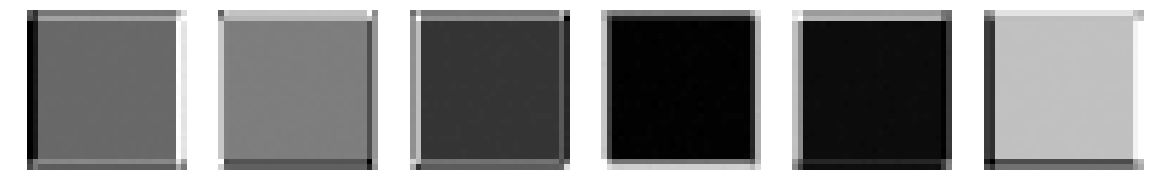

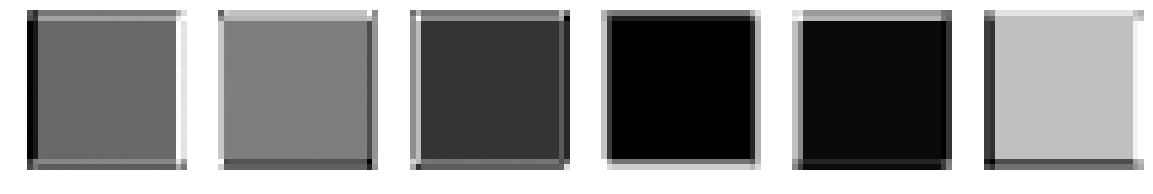

In [34]:
model_2 =get_simple_model()
_ = plot_conv_filters(model_2, 'Conv1', input_img_data_1, iterations=100, step = 100)
_ = plot_conv_filters(model_2, 'Conv1', input_img_data_2, iterations=100, step = 100)

In [35]:
model_3 = get_simple_model()

In [36]:
weights = model_3.get_weights()
print(weights[0].shape)

(3, 3, 1, 6)


In [37]:
# Agarro un filtro
weights[0][:,:,0,0].shape

(3, 3)

In [39]:
weights[0].shape

(3, 3, 1, 6)

In [41]:
weights[0][:,:,0,0] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
weights[0][:,:,1,0] = np.array([[-1, 1, 1], [1, -1, 1], [1, 1, -1]])
#weights[2][:,:,0,1] = np.array([[-1, 1, 1], [1, -1, 1], [1, +1, -1]])
weights[0][:,:,2,0] = np.array([[1, 1, 1], [-1, -1, -1], [1, 1, 1]]).T
weights[0][:,:,3,0] = np.array([[1, -1, 1], [-1, 1, -1], [1, -1, 1]])
weights[0][:,:,4,0] = np.array([[-1, 1, -1], [1, -1, 1], [-1, +1, -1]])
#weights[0][:,:,0,4] = np.identity(3)
weights[0][:,:,5,0] = np.array([[1, 1, 1], [-1, -1, -1], [1, 1, 1]])

IndexError: index 1 is out of bounds for axis 2 with size 1

In [ ]:
for col in range(6):
    for row in range(6):
        weights[2][:,:,col,row] = np.identity(3)
model_3.set_weights(weights)

In [ ]:
plot_filter_coefs('Conv2', model_3)

In [ ]:
_ = plot_conv_filters(model_3, 'Conv1', input_img_data_1, iterations=100, step = 100)

In [ ]:
_ = plot_conv_filters(model_3, 'Conv2', input_img_data_1, iterations=100, step = 100)